# Graphs of second exercise

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
blis_double_close_epyc = pd.read_csv("./epyc/blis_double_close_epyc.csv")
blis_double_spread_epyc = pd.read_csv("./epyc/blis_double_spread_epyc.csv")
blis_single_close_epyc = pd.read_csv("./epyc/blis_single_close_epyc.csv")
blis_single_spread_epyc = pd.read_csv("./epyc/blis_single_spread_epyc.csv")
mkl_double_close_epyc = pd.read_csv("./epyc/mkl_double_close_epyc.csv")
mkl_double_spread_epyc = pd.read_csv("./epyc/mkl_double_spread_epyc.csv")
mkl_single_close_epyc = pd.read_csv("./epyc/mkl_single_close_epyc.csv")
mkl_single_spread_epyc = pd.read_csv("./epyc/mkl_single_spread_epyc.csv")
oblas_double_close_epyc = pd.read_csv("./epyc/oblas_double_close_epyc.csv")
oblas_double_spread_epyc = pd.read_csv("./epyc/oblas_double_spread_epyc.csv")
oblas_single_close_epyc = pd.read_csv("./epyc/oblas_single_close_epyc.csv")
oblas_single_spread_epyc = pd.read_csv("./epyc/oblas_single_spread_epyc.csv")

## 1 Double precision:

### 1.1 Measured GFLOPS

peak_gflops = 3.3 (cpu turbo ghz, epyc) * 2 * 4 * 2 * num_cpus

for single precision, multiply above with 2

epyc: 3.3 turbo, 2.6 normal

thin: 3.7 turbo, 2.6 normal

In [140]:
#peak power calculation:

peak_gflops_epyc = []
peak_gflops_thin = []
min_gflops_epyc = []
min_gflops_thin = []

procesors_epyc = mkl_double_close_epyc["cores"]
procesors_thin = mkl_double_close_thin["cores"]

for proc in procesors_epyc:
    tmp = []
    peak = 3.3*16*proc*2
    min = 2.6*16*proc*2
    tmp.append(peak)
    tmp.append(peak*2) #single precision
    peak_gflops_epyc.append(tmp)
    tmp = []
    tmp.append(min)
    tmp.append(min*2) #single presicision
    min_gflops_epyc.append(tmp)

for proc in procesors_thin:
    tmp = []
    peak = 3.3*16*proc*2
    min = 2.6*16*proc*2
    tmp.append(peak)
    tmp.append(peak*2)
    peak_gflops_thin.append(tmp)
    tmp = []
    tmp.append(min)
    tmp.append(min*2)
    min_gflops_thin.append(tmp)

peak_gflops_epyc = np.array(peak_gflops_epyc)
peak_gflops_thin = np.array(peak_gflops_thin)
min_gflops_epyc = np.array(min_gflops_epyc)
min_gflops_thin = np.array(min_gflops_thin)
print(min_gflops_thin[:,0][-1])
print(min_gflops_epyc[:,0][-1])

998.4000000000001
5324.8


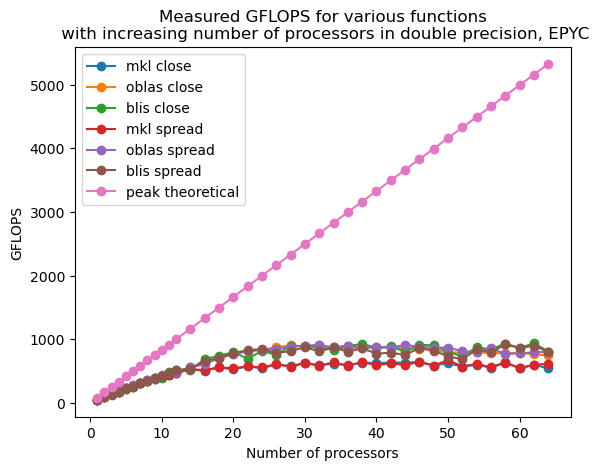

In [142]:
plt.plot(mkl_double_close_epyc["cores"], mkl_double_close_epyc["gflops"], '-o', label='mkl close')
plt.plot(oblas_double_close_epyc["cores"], oblas_double_close_epyc["gflops"], '-o', label='oblas close')
plt.plot(blis_double_close_epyc["cores"], blis_double_close_epyc["gflops"], '-o',label='blis close')
plt.plot(mkl_double_spread_epyc["cores"], mkl_double_spread_epyc["gflops"], '-o', label='mkl spread')
plt.plot(oblas_double_spread_epyc["cores"], oblas_double_spread_epyc["gflops"], '-o', label='oblas spread')
plt.plot(blis_double_spread_epyc["cores"], blis_double_spread_epyc["gflops"], '-o', label='blis spread')
plt.plot(procesors_epyc, min_gflops_epyc[:,0], '-o', label="peak theoretical")
plt.xlabel("Number of processors")
plt.ylabel("GFLOPS")
plt.title("Measured GFLOPS for various functions\n with increasing number of processors in double precision, EPYC")
plt.legend()
plt.show()

In [73]:
blis_double_close_thin = pd.read_csv("./thin/blis_double_close_thin.csv").head(12)
blis_double_spread_thin = pd.read_csv("./thin/blis_double_spread_thin.csv").head(12)
blis_single_close_thin = pd.read_csv("./thin/blis_single_close_thin.csv").head(12)
blis_single_spread_thin = pd.read_csv("./thin/blis_single_spread_thin.csv").head(12)
mkl_double_close_thin = pd.read_csv("./thin/mkl_double_close_thin.csv").dropna()
mkl_double_spread_thin = pd.read_csv("./thin/mkl_double_spread_thin.csv").dropna()
mkl_single_close_thin = pd.read_csv("./thin/mkl_single_close_thin.csv").dropna()
mkl_single_spread_thin = pd.read_csv("./thin/mkl_single_spread_thin.csv").dropna()
oblas_double_close_thin = pd.read_csv("./thin/oblas_double_close_thin.csv").dropna()
oblas_double_spread_thin = pd.read_csv("./thin/oblas_double_spread_thin.csv").dropna()
oblas_single_close_thin = pd.read_csv("./thin/oblas_single_close_thin.csv").dropna()
oblas_single_spread_thin = pd.read_csv("./thin/oblas_single_spread_thin.csv").dropna()

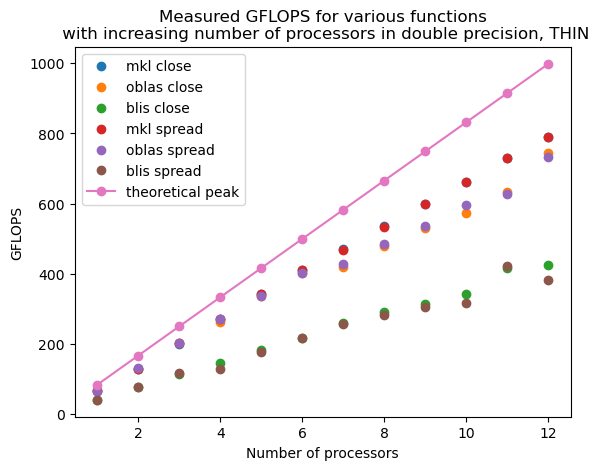

In [143]:
plt.plot(mkl_double_close_thin["cores"], mkl_double_close_thin["gflops"], 'o', label='mkl close')
plt.plot(oblas_double_close_thin["cores"], oblas_double_close_thin["gflops"], 'o', label='oblas close')
plt.plot(blis_double_close_thin["cores"], blis_double_close_thin["gflops"], 'o',label='blis close')
plt.plot(mkl_double_spread_thin["cores"], mkl_double_spread_thin["gflops"], 'o', label='mkl spread')
plt.plot(oblas_double_spread_thin["cores"], oblas_double_spread_thin["gflops"], 'o', label='oblas spread')
plt.plot(blis_double_spread_thin["cores"], blis_double_spread_thin["gflops"], 'o', label='blis spread')
plt.plot(procesors_thin, min_gflops_thin[:,0], '-o', label='theoretical peak')
plt.xlabel("Number of processors")
plt.ylabel("GFLOPS")
plt.title("Measured GFLOPS for various functions\n with increasing number of processors in double precision, THIN")
plt.legend()
plt.show()

### 1.2 Speed up

In [75]:
mkl_double_close_epyc.iloc[0,4]/mkl_double_close_epyc.iloc[2,4]
print(mkl_double_close_epyc.iloc[0,4], mkl_double_close_epyc.iloc[1,4], mkl_double_close_epyc.iloc[0,4]/mkl_double_close_epyc.iloc[1,4])

31.504469 16.140885 1.9518427273349632


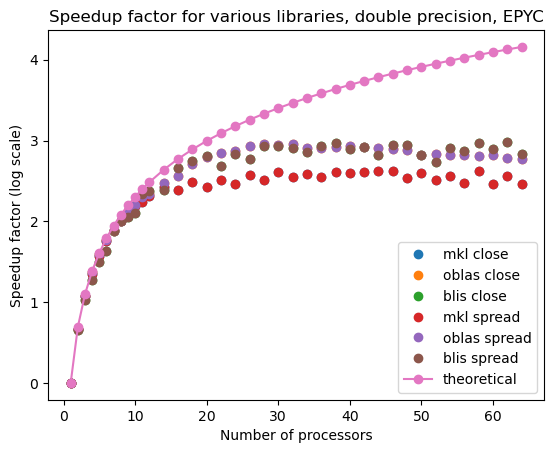

In [128]:
epyc_proc = mkl_double_close_epyc["cores"]
mkl_double_close_epyc_speedup = []
mkl_double_spread_epyc_speedup = []
oblas_double_close_epyc_speedup = []
oblas_double_spread_epyc_speedup = []
blis_double_close_epyc_speedup = []
blis_double_spread_epyc_speedup = []

for i in range(0,38):
    mkl_double_close_epyc_speedup.append(mkl_double_close_epyc.iloc[0,4]/mkl_double_close_epyc.iloc[i,4])

for time in mkl_double_spread_epyc["time[s]"]:
    mkl_double_spread_epyc_speedup.append(mkl_double_spread_epyc.iloc[0,4]/time)

for time in oblas_double_close_epyc["time[s]"]:
    oblas_double_close_epyc_speedup.append(oblas_double_close_epyc.iloc[0,4]/time)

for time in oblas_double_spread_epyc["time[s]"]:
    oblas_double_spread_epyc_speedup.append(oblas_double_spread_epyc.iloc[0,4]/time)

for time in blis_double_close_epyc[" time[s]"]:
    blis_double_close_epyc_speedup.append(blis_double_close_epyc.iloc[0,4]/time)

for time in blis_double_spread_epyc[" time[s]"]:
    blis_double_spread_epyc_speedup.append(blis_double_spread_epyc.iloc[0,4]/time)

plt.plot(epyc_proc, np.log(mkl_double_close_epyc_speedup), "o", label='mkl close')
plt.plot(epyc_proc, np.log(oblas_double_close_epyc_speedup), "o", label='oblas close')
plt.plot(epyc_proc, np.log(blis_double_close_epyc_speedup), "o", label='blis close')
plt.plot(epyc_proc, np.log(mkl_double_close_epyc_speedup), "o", label='mkl spread')
plt.plot(epyc_proc, np.log(oblas_double_close_epyc_speedup), "o", label='oblas spread')
plt.plot(epyc_proc, np.log(blis_double_close_epyc_speedup), "o", label='blis spread')
plt.plot(epyc_proc, np.log(epyc_proc), "-o", label="theoretical")
plt.xlabel("Number of processors")
plt.ylabel("Speedup factor (log scale)")
plt.title("Speedup factor for various libraries, double precision, EPYC")
plt.legend()
plt.show()

In [129]:
# plt.plot(epyc_proc, np.log(mkl_double_close_epyc_speedup), "o", label='mkl spread')
# plt.plot(epyc_proc, np.log(oblas_double_close_epyc_speedup), "o", label='oblas spread')
# plt.plot(epyc_proc, np.log(blis_double_close_epyc_speedup), "o", label='blis spread')
# plt.plot(epyc_proc, np.log(epyc_proc), "o", label="theoretical")
# plt.xlabel("Number of processors")
# plt.ylabel("Speedup factor (log scale)")
# plt.title("Speedup factor for various libraries, double precision, EPYC")
# plt.legend()
# plt.show()

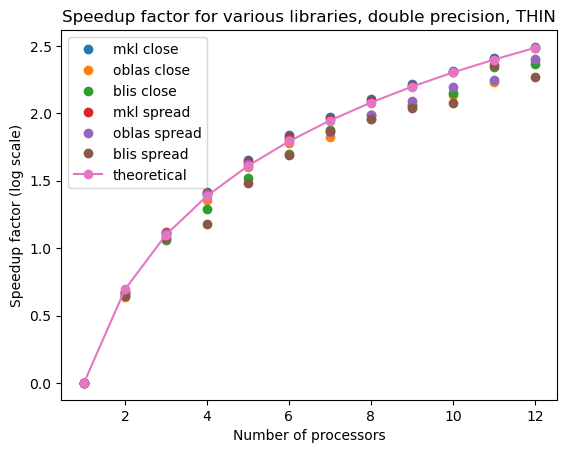

In [125]:
thin_proc = mkl_double_close_thin["cores"]
mkl_double_close_thin_speedup = []
mkl_double_spread_thin_speedup = []
oblas_double_close_thin_speedup = []
oblas_double_spread_thin_speedup = []
blis_double_close_thin_speedup = []
blis_double_spread_thin_speedup = []

for i in range(0,12):
    mkl_double_close_thin_speedup.append(mkl_double_close_thin.iloc[0,4]/mkl_double_close_thin.iloc[i,4])

for time in mkl_double_spread_thin["time[s]"]:
    mkl_double_spread_thin_speedup.append(mkl_double_spread_thin.iloc[0,4]/time)

for time in oblas_double_close_thin["time[s]"]:
    oblas_double_close_thin_speedup.append(oblas_double_close_thin.iloc[0,4]/time)

for time in oblas_double_spread_thin["time[s]"]:
    oblas_double_spread_thin_speedup.append(oblas_double_spread_thin.iloc[0,4]/time)

for time in blis_double_close_thin[" time[s]"]:
    blis_double_close_thin_speedup.append(blis_double_close_thin.iloc[0,4]/time)

for time in blis_double_spread_thin[" time[s]"]:
    blis_double_spread_thin_speedup.append(blis_double_spread_thin.iloc[0,4]/time)

plt.plot(thin_proc, np.log(mkl_double_close_thin_speedup), "o", label='mkl close')
plt.plot(thin_proc, np.log(oblas_double_close_thin_speedup), "o", label='oblas close')
plt.plot(thin_proc, np.log(blis_double_close_thin_speedup), "o", label='blis close')
plt.plot(thin_proc, np.log(mkl_double_spread_thin_speedup), "o", label='mkl spread')
plt.plot(thin_proc, np.log(oblas_double_spread_thin_speedup), "o", label='oblas spread')
plt.plot(thin_proc, np.log(blis_double_spread_thin_speedup), "o", label='blis spread')
plt.plot(thin_proc, np.log(thin_proc), "-o", label="theoretical")
plt.xlabel("Number of processors")
plt.ylabel("Speedup factor (log scale)")
plt.title("Speedup factor for various libraries, double precision, THIN")
plt.legend()
plt.show()

## 2 Single precision

### 2.1 Measured GFLOPS

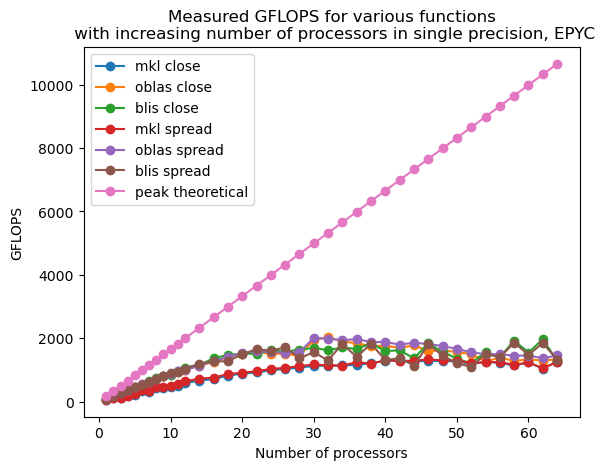

In [144]:
plt.plot(mkl_single_close_epyc["cores"], mkl_single_close_epyc["gflops"], '-o', label='mkl close')
plt.plot(oblas_single_close_epyc["cores"], oblas_single_close_epyc["gflops"], '-o', label='oblas close')
plt.plot(blis_single_close_epyc["cores"], blis_single_close_epyc["gflops"], '-o',label='blis close')
plt.plot(mkl_single_spread_epyc["cores"], mkl_single_spread_epyc["gflops"], '-o', label='mkl spread')
plt.plot(oblas_single_spread_epyc["cores"], oblas_single_spread_epyc["gflops"], '-o', label='oblas spread')
plt.plot(blis_single_spread_epyc["cores"], blis_single_spread_epyc["gflops"], '-o', label='blis spread')
plt.plot(procesors_epyc, min_gflops_epyc[:,1], '-o', label='peak theoretical')
plt.xlabel("Number of processors")
plt.ylabel("GFLOPS")
plt.title("Measured GFLOPS for various functions\n with increasing number of processors in single precision, EPYC")
plt.legend()
plt.show()

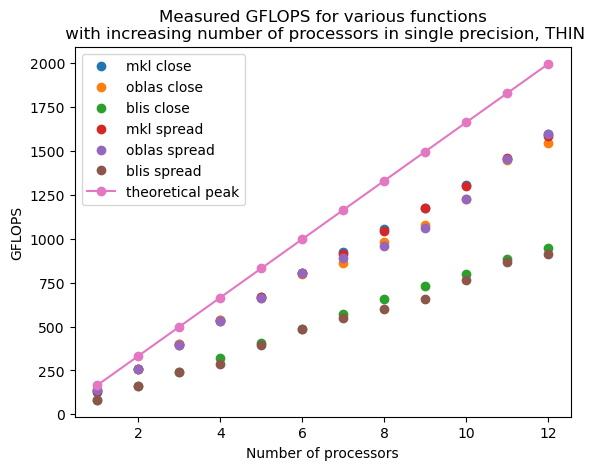

In [145]:
plt.plot(mkl_single_close_thin["cores"], mkl_single_close_thin["gflops"], 'o', label='mkl close')
plt.plot(oblas_single_close_thin["cores"], oblas_single_close_thin["gflops"], 'o', label='oblas close')
plt.plot(blis_single_close_thin["cores"], blis_single_close_thin["gflops"], 'o',label='blis close')
plt.plot(mkl_single_spread_thin["cores"], mkl_single_spread_thin["gflops"], 'o', label='mkl spread')
plt.plot(oblas_single_spread_thin["cores"], oblas_single_spread_thin["gflops"], 'o', label='oblas spread')
plt.plot(blis_single_spread_thin["cores"], blis_single_spread_thin["gflops"], 'o', label='blis spread')
plt.plot(procesors_thin, min_gflops_thin[:,1], '-o', label='theoretical peak')
plt.xlabel("Number of processors")
plt.ylabel("GFLOPS")
plt.title("Measured GFLOPS for various functions\n with increasing number of processors in single precision, THIN")
plt.legend()
plt.show()

### 2.2 Speedup

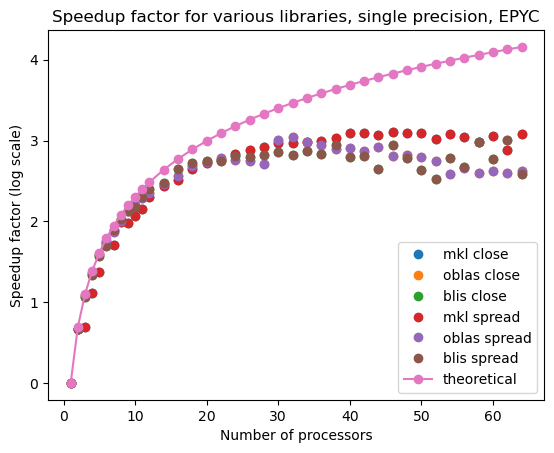

In [131]:
epyc_proc = mkl_single_close_epyc["cores"]
mkl_single_close_epyc_speedup = []
mkl_single_spread_epyc_speedup = []
oblas_single_close_epyc_speedup = []
oblas_single_spread_epyc_speedup = []
blis_single_close_epyc_speedup = []
blis_single_spread_epyc_speedup = []

for i in range(0,38):
    mkl_single_close_epyc_speedup.append(mkl_single_close_epyc.iloc[0,4]/mkl_single_close_epyc.iloc[i,4])

for time in mkl_single_spread_epyc["time[s]"]:
    mkl_single_spread_epyc_speedup.append(mkl_single_spread_epyc.iloc[0,4]/time)

for time in oblas_single_close_epyc["time[s]"]:
    oblas_single_close_epyc_speedup.append(oblas_single_close_epyc.iloc[0,4]/time)

for time in oblas_single_spread_epyc["time[s]"]:
    oblas_single_spread_epyc_speedup.append(oblas_single_spread_epyc.iloc[0,4]/time)

for time in blis_single_close_epyc[" time[s]"]:
    blis_single_close_epyc_speedup.append(blis_single_close_epyc.iloc[0,4]/time)

for time in blis_single_spread_epyc[" time[s]"]:
    blis_single_spread_epyc_speedup.append(blis_single_spread_epyc.iloc[0,4]/time)

plt.plot(epyc_proc, np.log(mkl_single_close_epyc_speedup), "o", label='mkl close')
plt.plot(epyc_proc, np.log(oblas_single_close_epyc_speedup), "o", label='oblas close')
plt.plot(epyc_proc, np.log(blis_single_close_epyc_speedup), "o", label='blis close')
plt.plot(epyc_proc, np.log(mkl_single_close_epyc_speedup), "o", label='mkl spread')
plt.plot(epyc_proc, np.log(oblas_single_close_epyc_speedup), "o", label='oblas spread')
plt.plot(epyc_proc, np.log(blis_single_close_epyc_speedup), "o", label='blis spread')
plt.plot(epyc_proc, np.log(epyc_proc), "-o", label="theoretical")
plt.xlabel("Number of processors")
plt.ylabel("Speedup factor (log scale)")
plt.title("Speedup factor for various libraries, single precision, EPYC")
plt.legend()
plt.show()

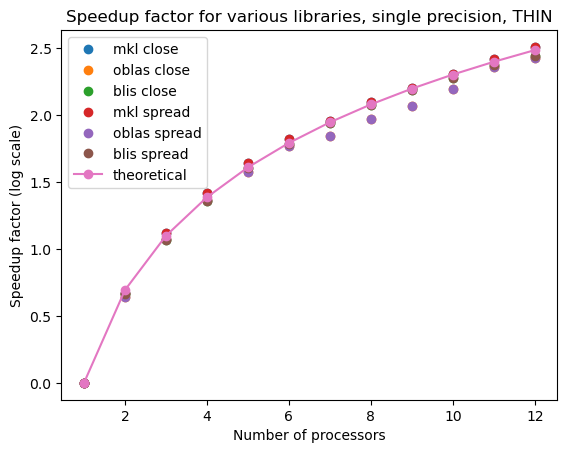

In [132]:
thin_proc = mkl_single_close_thin["cores"]
mkl_single_close_thin_speedup = []
mkl_single_spread_thin_speedup = []
oblas_single_close_thin_speedup = []
oblas_single_spread_thin_speedup = []
blis_single_close_thin_speedup = []
blis_single_spread_thin_speedup = []

for i in range(0,12):
    mkl_single_close_thin_speedup.append(mkl_single_close_thin.iloc[0,4]/mkl_single_close_thin.iloc[i,4])

for time in mkl_single_spread_thin["time[s]"]:
    mkl_single_spread_thin_speedup.append(mkl_single_spread_thin.iloc[0,4]/time)

for time in oblas_single_close_thin["time[s]"]:
    oblas_single_close_thin_speedup.append(oblas_single_close_thin.iloc[0,4]/time)

for time in oblas_single_spread_thin["time[s]"]:
    oblas_single_spread_thin_speedup.append(oblas_single_spread_thin.iloc[0,4]/time)

for time in blis_single_close_thin[" time[s]"]:
    blis_single_close_thin_speedup.append(blis_single_close_thin.iloc[0,4]/time)

for time in blis_single_spread_thin[" time[s]"]:
    blis_single_spread_thin_speedup.append(blis_single_spread_thin.iloc[0,4]/time)

plt.plot(thin_proc, np.log(mkl_single_close_thin_speedup), "o", label='mkl close')
plt.plot(thin_proc, np.log(oblas_single_close_thin_speedup), "o", label='oblas close')
plt.plot(thin_proc, np.log(blis_single_close_thin_speedup), "o", label='blis close')
plt.plot(thin_proc, np.log(mkl_single_close_thin_speedup), "o", label='mkl spread')
plt.plot(thin_proc, np.log(oblas_single_close_thin_speedup), "o", label='oblas spread')
plt.plot(thin_proc, np.log(blis_single_close_thin_speedup), "o", label='blis spread')
plt.plot(thin_proc, np.log(thin_proc), "-o", label="theoretical")
plt.xlabel("Number of processors")
plt.ylabel("Speedup factor (log scale)")
plt.title("Speedup factor for various libraries, single precision, THIN")
plt.legend()
plt.show()

### Testing plotting theoretical limit:

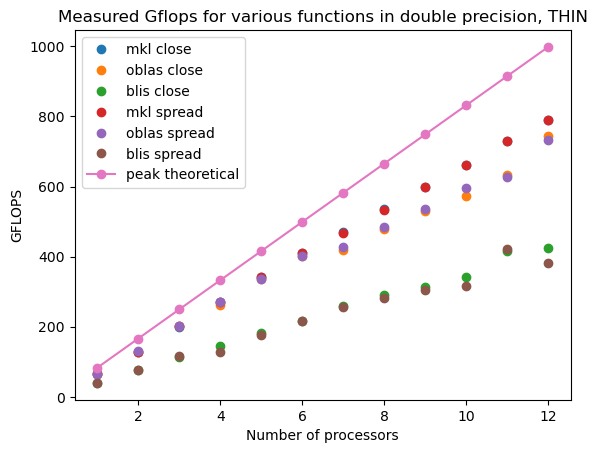

In [120]:
plt.plot(mkl_double_close_thin["cores"], mkl_double_close_thin["gflops"], 'o', label='mkl close')
plt.plot(oblas_double_close_thin["cores"], oblas_double_close_thin["gflops"], 'o', label='oblas close')
plt.plot(blis_double_close_thin["cores"], blis_double_close_thin["gflops"], 'o',label='blis close')
plt.plot(mkl_double_spread_thin["cores"], mkl_double_spread_thin["gflops"], 'o', label='mkl spread')
plt.plot(oblas_double_spread_thin["cores"], oblas_double_spread_thin["gflops"], 'o', label='oblas spread')
plt.plot(blis_double_spread_thin["cores"], blis_double_spread_thin["gflops"], 'o', label='blis spread')
plt.plot(procesors_thin, min_gflops_thin[:,0], '-o', label='peak theoretical')
plt.xlabel("Number of processors")
plt.ylabel("GFLOPS")
plt.title("Measured Gflops for various functions in double precision, THIN")
plt.legend()
plt.show()

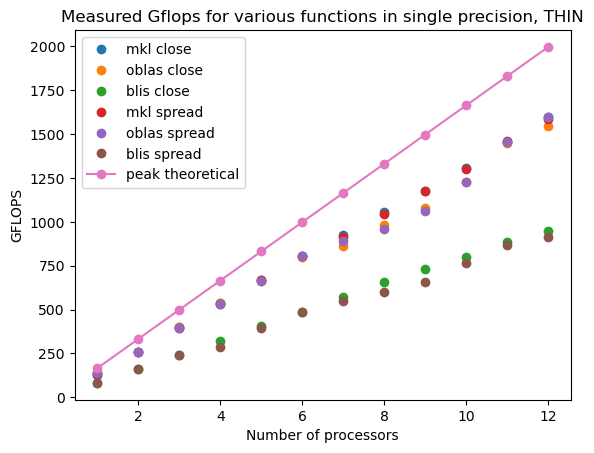

In [121]:
plt.plot(mkl_single_close_thin["cores"], mkl_single_close_thin["gflops"], 'o', label='mkl close')
plt.plot(oblas_single_close_thin["cores"], oblas_single_close_thin["gflops"], 'o', label='oblas close')
plt.plot(blis_single_close_thin["cores"], blis_single_close_thin["gflops"], 'o',label='blis close')
plt.plot(mkl_single_spread_thin["cores"], mkl_single_spread_thin["gflops"], 'o', label='mkl spread')
plt.plot(oblas_single_spread_thin["cores"], oblas_single_spread_thin["gflops"], 'o', label='oblas spread')
plt.plot(blis_single_spread_thin["cores"], blis_single_spread_thin["gflops"], 'o', label='blis spread')
plt.plot(procesors_thin, min_gflops_thin[:,1], '-o', label='peak theoretical')
plt.xlabel("Number of processors")
plt.ylabel("GFLOPS")
plt.title("Measured Gflops for various functions in single precision, THIN")
plt.legend()
plt.show()